In [26]:
import pandas as pd
import numpy as np
import os
import random
import math
os.chdir('/home/ishaan/Machine-Learning/datasets')
dat=pd.read_csv('subject_classify.csv',header=None)
m=dat.shape[0]
dat['e'] = pd.Series(np.ones(m), index=dat.index)
cols = list(dat)
cols.insert(0, cols.pop(cols.index('e')))
dat = dat.ix[:, cols]
train_data=dat.ix[0:dat.shape[0]/2,:]
test_data=dat.ix[(dat.shape[0]/2)+1:,:]
print dat.head(10)


     e        0         1         2         3         4        5         6  \
0  1.0 -4.19290  2.517100  0.473780 -0.628430 -2.687400  0.28546  0.191070   
1  1.0 -6.68060  2.969700  0.990980  2.466200  2.115500 -0.27363 -0.371340   
2  1.0 -0.25967  0.423830  0.089746  0.103350 -0.210260 -0.31418  0.092722   
3  1.0 -1.15640  0.848080 -0.259460 -0.411420 -1.437400 -0.43879  0.607720   
4  1.0 -0.66666  0.214390  0.041861 -0.129960 -0.363050 -0.39517  0.053495   
5  1.0 -0.17517  0.043968 -0.316620 -0.042977  0.122490 -0.28860 -0.040541   
6  1.0 -1.34120 -1.162900 -0.029398 -0.135130  0.497580 -1.47260 -0.007152   
7  1.0 -0.66152  0.849280  0.281970  0.030402 -0.294750 -0.43598  0.037590   
8  1.0 -1.74920  1.705500  0.545230  0.648500 -0.044507 -0.95528 -1.418200   
9  1.0 -1.04130  0.246810  0.140320 -0.858140  0.474890 -0.45504  0.168170   

          7         8         9  10  
0 -0.127260  0.630760 -1.673800   0  
1 -0.212700  1.974800  1.557300   0  
2  0.262780  0.141460  0.00

In [27]:
#apply gradient descent to find parameters from train data
num_iter=10
alpha=0.001
dat=train_data.head(1000)
m=dat.shape[0]
n=dat.shape[1]
theta=np.random.rand(n-1,1)
J=np.random.rand(num_iter,1)
for i in range(0,num_iter):
    #calulate sigma h(theta)-y
    sigma=np.random.rand(m,1)
    for j in range(0,m):
        val=0
        for k in range(0,n-1):
            val=val+theta[k,0]*dat.ix[j,k]
        sigma[j,0]=(1.0/(1.0+math.exp(-val)))-dat.ix[j,n-1]
    for l in range(0,n-1):
        final_val=0
        for p in range(0,m):
            final_val=final_val+(sigma[p,0]*dat.ix[p,l])  
        theta[l,0]=theta[l,0]-((final_val*alpha))
    J[i,0]=np.sum(sigma*sigma)

print theta
    
            
    

[[ 1.38919645]
 [ 0.48889168]
 [ 0.29442776]
 [ 0.95130778]
 [ 0.22868063]
 [ 0.79660211]
 [ 0.40099446]
 [ 0.47768804]
 [ 0.0656927 ]
 [ 0.79517503]
 [ 0.78884668]]


In [28]:
test_data["pr_value"]=0
test_data["prediction"]=0
for i in range(0,n-1):
    test_data["pr_value"]=test_data["pr_value"]+theta[i,0]*test_data.ix[:,i]
test_data[test_data.pr_value>=0]["prediction"]=1
test_data[test_data.pr_value<0]["prediction"]=0
print test_data.head(10)

         e       0        1         2       3         4        5        6  \
13367  1.0 -3.5131 -0.66450 -4.034700 -1.9413 -0.059257 -1.32880  0.27623   
13368  1.0 -4.3907  0.56742 -2.751400 -2.6566 -0.076086 -1.43130 -0.69968   
13369  1.0 -5.1244  0.29490 -4.457000 -2.6601  0.498050 -0.88954  0.10877   
13370  1.0 -5.3142  1.49250 -1.133000 -2.4368 -4.665200 -0.19812  0.84592   
13371  1.0 -6.2862  1.32270  0.256020 -2.2540 -5.627800  0.57826  0.90655   
13372  1.0 -4.4626  1.68160 -0.093382 -1.7612 -4.445700  0.12084  1.34350   
13373  1.0 -6.4889  0.38592 -1.206900 -2.8539 -5.270600 -0.50799  0.20563   
13374  1.0 -5.8702  0.17327 -1.557000 -2.5362 -5.269700 -0.55889  0.55013   
13375  1.0 -7.1271  1.42900 -0.991570 -2.4648 -5.046500  0.45163  1.78130   
13376  1.0 -4.6524  1.41520 -1.355600 -1.8094 -3.914100 -0.26271  1.97970   

              7        8        9  10  pr_value  prediction  
13367 -0.674860 -0.78766  0.30621   0 -5.683357           0  
13368 -0.921450 -0.61648 -0.

/home/ishaan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ishaan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
accuracy=(sum(test_data.ix[:,11]==test_data["prediction"])/(test_data.shape[0]*1.0)*100)

In [30]:
print "accuracy of test set is ",accuracy,"%"

accuracy of test set is  96.5808768517 %


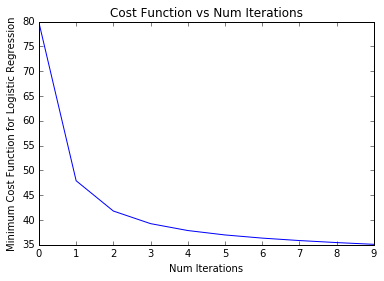

In [31]:
import matplotlib.pyplot as plt
from random import *
%matplotlib inline 
x = range(10)
y=J
plt.plot(x, y)
plt.xlabel('Num Iterations')
plt.ylabel('Minimum Cost Function for Logistic Regression')
plt.title('Cost Function vs Num Iterations')
plt.show()

In [32]:
test_data.rename(columns={0 : 'First Principal',10 : 'actual_value'},inplace=True)
print test_data.head(10)

         e  First Principal        1         2       3         4        5  \
13367  1.0          -3.5131 -0.66450 -4.034700 -1.9413 -0.059257 -1.32880   
13368  1.0          -4.3907  0.56742 -2.751400 -2.6566 -0.076086 -1.43130   
13369  1.0          -5.1244  0.29490 -4.457000 -2.6601  0.498050 -0.88954   
13370  1.0          -5.3142  1.49250 -1.133000 -2.4368 -4.665200 -0.19812   
13371  1.0          -6.2862  1.32270  0.256020 -2.2540 -5.627800  0.57826   
13372  1.0          -4.4626  1.68160 -0.093382 -1.7612 -4.445700  0.12084   
13373  1.0          -6.4889  0.38592 -1.206900 -2.8539 -5.270600 -0.50799   
13374  1.0          -5.8702  0.17327 -1.557000 -2.5362 -5.269700 -0.55889   
13375  1.0          -7.1271  1.42900 -0.991570 -2.4648 -5.046500  0.45163   
13376  1.0          -4.6524  1.41520 -1.355600 -1.8094 -3.914100 -0.26271   

             6         7        8        9  actual_value  pr_value  prediction  
13367  0.27623 -0.674860 -0.78766  0.30621             0 -5.683357     

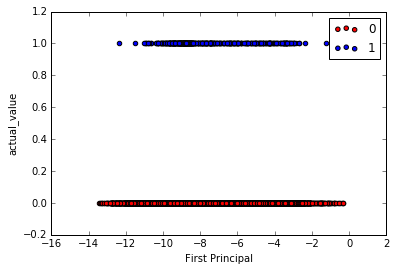

In [33]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'blue'}

grouped = test_data.groupby('actual_value')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='First Principal', y='actual_value', label=key, color=colors[key])

plt.show()

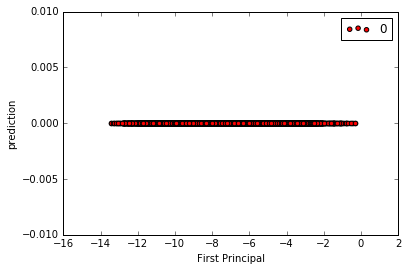

In [25]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue'}
grouped = test_data.groupby('prediction')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='First Principal', y='prediction', label=key, color=colors[key])

plt.show()